### Regressão linear múltipla

* não quer dizer que incluirmos no modelo mais variáveis, ele  será melhor;
* O idel é selecionar variáveis que possuam alta correlação;
* Nesse exemplo vamos prever o consumo.

In [36]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [37]:
# Carregamento da base de dados e exclusão da primeiro coluna
df = pd.read_csv('mt_cars.csv')
df.shape

(32, 12)

In [38]:
#mpeg consumo (milhas por galão), cyl clindros, disp cilindradas, hp
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [39]:
#exclui coluna
df = df.drop(['Unnamed: 0'], axis = 1)

In [40]:
# Criação de X e Y: variável independente e variável dependente
# Cálculo da correlação entre X e Y
#Quanto mais cilindrada menos km por litro
X = df.iloc[:, 2].values #coluna disp
y = df.iloc[:, 0].values #coluna mpg
correlacao = np.corrcoef(X, y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [41]:
# Mudança do formato de X para o formato de matriz (necessário para versões mais recentes do sklearn)
from sklearn.model_selection import train_test_split
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [42]:
# Criação do modelo, treinamento, visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [43]:
#Interceptação
modelo.intercept_

30.7814566565213

In [44]:
#inclinação ou coef_ Coeficientes da regressão linear. 
modelo.coef_

array([-0.0435745])

In [45]:
# Geração das previsões
previsoes = modelo.predict(X_test)
previsoes

array([26.07541071, 25.53944436, 23.80953673, 23.47837054, 18.76360969,
       20.97719426, 25.54815926])

### Coeficiente de Determinação (R2)
* Lembrando que R2 é o percentual de variação da variável de resposta que é explicada pelo modelo;
* Quando se colocam mais variáveis no modelo, a tendência é que R2 aumente, mesmo que a adição da variável não aumente a precisão do modelo;
* Para isso, utiliza-se R2 ajustado, que ajusta a variação do modelo de acordo com o numero de variáveis independentes que é incluída no modelo;
* R2 ajustado vai ser sempre menor que R2.

In [83]:
# Previsão para somente um valor
modelo.predict([[200]])

array([22.06655675])

In [48]:
# Criação de novas variáveis X1 e Y1 e novo modelo para comparação com o anterior
# 3 variáveis dependentes para prever mpg: cyl	disp	hp
X1 = df.iloc[:, 1:4].values
X1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [49]:
y1 = df.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(X1, y1)
#R^2
modelo2.score(X1, y1)

0.7678877440928638

In [50]:
# Previsão de um novo registro
novo = np.array([4, 200, 100])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([24.03968887])

### Outro exemplos 
Prever o preço de um imóvel. Neste capítulo, analisaremos vários tipos de modelos de regressão. Usaremos o conjunto de dados habitacionais de Boston (https://oreil.ly/b2bKQ) para explorá-los.

In [51]:
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn import (model_selection,preprocessing) 
import warnings
warnings.filterwarnings('ignore')

In [52]:
b = load_boston()

In [53]:
display(b)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [54]:
bos_X = pd.DataFrame(b.data, columns=b.feature_names)
bos_X.shape

(506, 13)

In [55]:
bos_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Sumário
* CRIM Taxa de crimes per capita por cidade;
* ZN Proporção de áreas residenciais zoneadas para lotes acima de 25 mil pés quadrados (aproximadamente 2.320 metros quadrados); 
* INDUS Proporção de acres para negócios não ligados ao varejo por cidade; 
* CHAS Variável dummy sobre o Rio Charles (1 se a região faz fronteira com o rio; 0 caso contrário); 
* NOX Concentração de óxidos nítricos (partes por 10 milhões);
* RM Número médio de cômodos por habitação; 
* AGE Proporção de unidades ocupadas por proprietários construídas antes de 1940; 
* DIS Distâncias ponderadas até cinco centros de empregos em Boston; 
* RAD Índice de acessibilidade às rodovias radiais; 
* TAX Taxa de impostos sobre o valor total da propriedade por 10 mil dólares; 
* PTRATIO Razão entre aluno-professor por cidade;
* B 1000(Bk - 0.63)^2, em que Bk é a proporção de negros (Bk = Black) por cidade (esse conjunto de dados é de 1978);
* LSTAT Porcentagem da população com status mais baixo; 
* MEDV Valor médio das casas ocupadas por proprietários em incrementos de 1000 dólares.


OBS: Um modelo de regressão básico nos dará algo com o qual poderemos comparar outros modelos. No sklearn, o resultado default do método .score é o coeficiente de determinação (r2 ou R2).

In [56]:
bos_y = b.target

In [57]:
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(bos_X,bos_y,test_size=0.3,
                                                                                    random_state=42) 

In [58]:
bos_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [114]:
lr = LinearRegression() 
lr.fit(bos_X_train, bos_y_train) 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [115]:
lr.score(bos_X_test, bos_y_test)

0.7112260057484914

In [116]:
lr.intercept_ 

31.63108403569288

In [117]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

### Avaliar o RMSE

In [118]:
#Calculo da metrica rmse
from sklearn.metrics import mean_squared_error
import numpy as np

In [119]:
y_pred = lr.predict(bos_X_test)

In [120]:
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 4.638689926172836


In [121]:
novo = np.array([1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58])
novo = novo.reshape(1, -1)
novo

array([[  1.05393,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.935  ,
         29.3    ,   4.4986 ,   4.     , 307.     ,  21.     , 386.85   ,
          6.58   ]])

In [122]:
#lr.predict(bos_X_test[:1])
lr.predict(novo)

array([21.26400891])

### Podemos observer que o simples fato de escalar o dado, pode afetar os coeficientes. Veremos no gráfico de Feature Importance 

In [123]:
bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(bos_sX,bos_y,test_size=0.3,
                                                                                        random_state=42)

In [124]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train) 
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression()

* Parâmetros da instância: n_jobs=None Número de CPUs a ser usadas, -1 se todas. 
* Atributos após a adequação: coef_ Coeficientes da regressão linear. 
* intercept_ Intercepto do modelo linear.

In [125]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484924

In [126]:
lr2.intercept_ 

22.50945471291039

In [127]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

### Avaliar o RMSE

In [128]:
y_pred = lr.predict(bos_X_test)

In [129]:
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 4.638689926172836


In [130]:
novo = np.array([1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58])
novo = novo.reshape(1, -1)
novo = preprocessing.StandardScaler().fit_transform(novo)
print(novo)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [131]:
lr.predict(novo)

array([31.63108404])

In [132]:
#Pegando a linha 100 pra predizer
novo = bos_sX[100]
novo = novo.reshape(1, -1)
lr.predict(novo)

array([37.73964756])

### Feature Importance

In [133]:
from yellowbrick.features import FeatureImportances

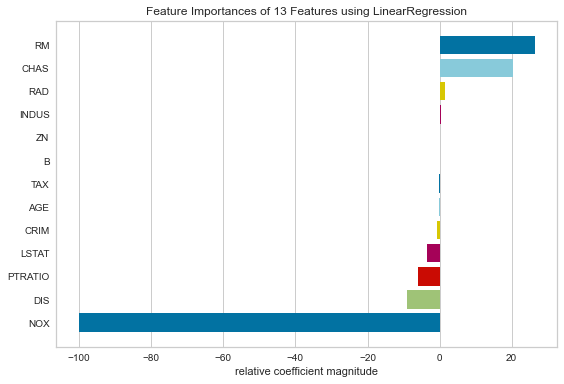

<AxesSubplot:title={'center':'Feature Importances of 13 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [81]:
#fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(lr, labels=bos_X.columns)
#fi_viz = FeatureImportances(lr2, labels=bos_X.columns)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()
#fig.savefig("images/mlpr_1401.png",bbox_inches="tight",dpi=300)

### Importância dos atributos. Este gráfico mostra que RM (número de cômodos) aumenta o preço, a idade (age) não importa e LSTAT (porcentagem da população com status mais baixo) reduz o preço.

### SVMs

#### As SVMs (Support Vector Machines, ou Máquinas de Vetores Suporte) também podem fazer regressão. As SVMs têm as seguintes propriedades:
Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 192). Novatec Editora. Edição do Kindle. 

* Eficiência na execução:
  * A implementação do scikit-learn é O(n4), portanto pode ser difícil escalar para tamanhos maiores. Usar um kernel linear
    ou o modelo LinearSVR pode melhorar o desempenho da execução, talvez à custa da acurácia. Aumentar o valor do parâmetro     cache_size pode reduzir a ordem para O(n3);
  * Pré-processamento dos dados: 
    O algoritmo não é invariante à escala (scale invariant), portanto padronizar os dados é extremamente recomendável;
  * Para evitar uma superadequação 
    O parâmetro C (parâmetro de penalidade) controla a regularização. Um valor menor permite uma margem menor no  
    hiperplano. Um valor maior para gamma tenderá a uma superadequação nos dados de treinamento. O modelo LinearSVR aceita 
    parâmetros loss e penalty para regularização. O parâmetro epsilon pode ser aumentado (com 0, você deve esperar uma 
    superadequação);
  * Interpretação dos resultados:
    Inspecione .support_vectors_, embora esses sejam difíceis de interpretar. Com kernels lineares, você poderá inspecionar 
    .coef_.

In [135]:
from sklearn.svm import SVR 

In [136]:
svr = SVR() 

In [137]:
svr.fit(bos_sX_train, bos_sy_train)

SVR()

In [138]:
svr.score(bos_sX_test, bos_sy_test)

0.6551893976487937

In [139]:
svr = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto', kernel='rbf', max_iter=-1, 
    shrinking=True, tol=0.001, verbose=False)

In [140]:
svr.fit(bos_sX_train, bos_sy_train)

SVR(gamma='auto')

In [141]:
svr.score(bos_sX_test, bos_sy_test)

0.6553772022206867

### Avaliar o RMSE

In [142]:
y_pred = svr.predict(bos_X_test)
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 8.632426614529752


In [143]:
#Pegando a linha 100 pra predizer
novo = bos_sX[100]
novo = novo.reshape(1, -1)
svr.predict(novo)

array([23.22603641])

### K vizinhos mais próximos - KNN

In [145]:
from sklearn.neighbors import KNeighborsRegressor

In [146]:
knr = KNeighborsRegressor()

In [147]:
knr.fit(bos_sX_train, bos_sy_train)

KNeighborsRegressor()

In [148]:
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

In [149]:
knr = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, 
                          n_jobs=1, n_neighbors=5, p=2, weights='uniform')

In [150]:
knr.fit(bos_sX_train, bos_sy_train)

KNeighborsRegressor(n_jobs=1)

In [151]:
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

### Avaliar o RMSE

In [152]:
y_pred = knr.predict(bos_X_test)
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 12.230211944628202


In [153]:
#Pegando a linha 100 pra predizer
novo = bos_sX[100]
novo = novo.reshape(1, -1)
knr.predict(novo)

array([21.6])

### Árvore de decisão

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
dtr = DecisionTreeRegressor(random_state=42)

In [159]:
dtr.fit(bos_X_train, bos_y_train)

DecisionTreeRegressor(random_state=42)

In [160]:
dtr.score(bos_X_test, bos_y_test)

0.8444833592340152

In [161]:
dtr = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2, 
                            min_weight_fraction_leaf=0.0,random_state=42,splitter='best') 

In [162]:
dtr.fit(bos_X_train, bos_y_train)

DecisionTreeRegressor(criterion='mse', random_state=42)

In [163]:
dtr.score(bos_X_test, bos_y_test)

0.8444833592340152

### Avaliar o RMSE

In [164]:
y_pred = dtr.predict(bos_X_test)
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 3.404119021977562


In [165]:
#Pegando a linha 100 pra predizer
novo = bos_sX[100]
novo = novo.reshape(1, -1)
dtr.predict(novo)

array([50.])

### Floresta aleatória

In [166]:
from sklearn.ensemble import RandomForestRegressor 

In [167]:
rfr = RandomForestRegressor(random_state=42, n_estimators=100)

In [168]:
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(random_state=42)

In [169]:
rfr.score(bos_X_test, bos_y_test)

0.8708997131330258

In [170]:
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None, max_features='auto', max_leaf_nodes=None, 
                      min_impurity_decrease=0.0, min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100, 
                      n_jobs=1, oob_score=False, random_state=42,verbose=0, warm_start=False) 

In [171]:
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(criterion='mse', max_features='auto', n_jobs=1,
                      random_state=42)

In [172]:
rfr.score(bos_X_test, bos_y_test)

0.8708997131330258

## Avaliar o RMSE

In [173]:
y_pred = rfr.predict(bos_X_test)
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 3.1015579977098433


In [187]:
#Pegando a linha 100 pra predizer
novo = bos_sX[100]
novo = novo.reshape(1, -1)
rfr.predict(novo)

array([38.826])

### Regressão XGBoost

In [174]:
import xgboost as xgb

In [175]:
xgr = xgb.XGBRegressor(random_state=42) 

In [176]:
xgr.fit(bos_X_train, bos_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [177]:
xgr.score(bos_X_test, bos_y_test)

0.876009538173606

### Avaliar o RMSE


In [178]:
y_pred = xgr.predict(bos_X_test)
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 3.0395580487258447


In [179]:
#Pegando a linha 100 pra predizer
novo = bos_sX[100]
novo = novo.reshape(1, -1)
xgr.predict(novo)

array([44.343163], dtype=float32)

### Importância dos atributos usando pesos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

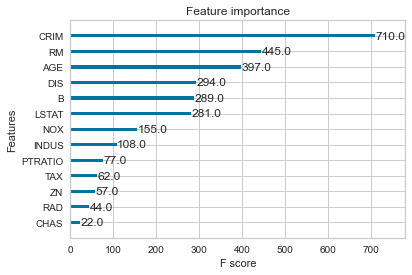

In [92]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax)
#fig.savefig("images/mlpr_1405.png", dpi=300)

### Métricas e avaliação de regressão

#### Score - R-Quadrado

In [181]:
#Coeficiente de determinação R2
from sklearn import metrics
from sklearn.metrics import r2_score

In [182]:
print(rfr.score(bos_X_test, bos_y_test))
print(xgr.score(bos_X_test, bos_y_test))

0.8708997131330258
0.876009538173606


In [184]:
#XGBOOST
r2_score(bos_y_test,y_pred)

0.876009538173606

In [185]:
#RMSE
#Calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(bos_y_test,y_pred)))
#Imprimir a performance do modelo
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo
print("Performance do modelo RMSE: {}".format(rmse))

Performance do modelo RMSE: 3.0395580487258447


#### Variância explicada ('explained_variance' na busca em grade). 
Se a média dos resíduos (erros nas predições) for 0 (em modelos OLS (Ordinary Least Squares, ou Mínimos Quadrados Ordinários)), a variância explicada será igual ao coeficiente de determinação:
Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 221). Novatec Editora. Edição do Kindle. 

In [217]:
#Vamos gerar as previsões
rfr_previsoes = rfr.predict(bos_X_test)
xgr_previsoes = xgr.predict(bos_X_test)

In [220]:
print(metrics.explained_variance_score(bos_y_test,rfr_previsoes))
print(metrics.explained_variance_score(bos_y_test,xgr_previsoes))

0.87128003640625
0.8770388916838091


### Gráficos

In [104]:
from yellowbrick.regressor import ResidualsPlot 

#### Gráficos para visualizar os residuais

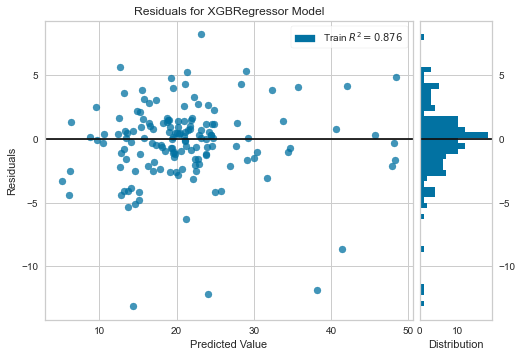

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [105]:
visualizador = ResidualsPlot(xgr)
visualizador.fit(bos_X_test, bos_y_test)
visualizador.poof()

#### Resíduos com distribuição normal

<AxesSubplot:title={'center':'Residual Histogram'}, ylabel='Frequency'>

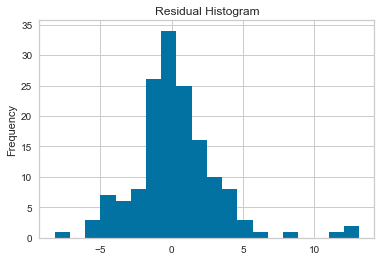

In [186]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = bos_y_test - xgr.predict(bos_X_test)
pd.Series(resids, name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram")

### Gráfico de probabilidades. Se as amostras representadas em relação aos quantis estiverem alinhadas, é sinal que os resíduos têm distribuição normal.   

In [188]:
from scipy import stats
import matplotlib.pyplot as plt

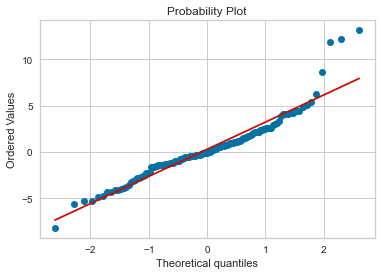

In [189]:
fig, ax = plt.subplots(figsize=(6,4))
a = stats.probplot(resids,plot=ax)

#### Como pode observer o valor está muito bom

### Gráficos de erros de predição
* Um gráfico de erro de previsão mostra os alvos reais do conjunto de dados em relação aos valores previstos gerados por nosso modelo. Isso nos permite ver quanta variação há no modelo. Em um modelo perfeito, esses pontos estariam alinhados em 45 graus.

In [192]:
from yellowbrick.regressor import PredictionError

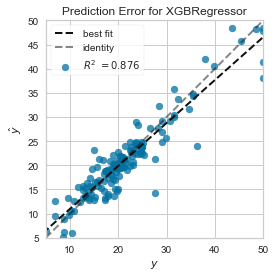

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [193]:
fig, ax = plt.subplots(figsize=(6, 4))
pev = PredictionError(xgr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.poof()

### Referências
* Como avaliar seu modelo de regressão 
As principais métricas para avaliar seus modelos de regressão. Disponível em: https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96. Acesso em 02/02/2023.
* LinearRegression. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. Acesso em 18/10/2022.
* Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 191). Novatec Editora. Edição do Kindle. 
* sklearn.svm.SVR. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html. Acesso em 24/10/2022.
* KNeighborsRegressor. Disponível em:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html. Acesso em 24/10/2022.
* sklearn.tree.DecisionTreeRegressor. Disponível em:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html. Acesso em 24/10/2022.
* sklearn.ensemble.RandomForestRegressor. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html. Acesso em 24/10/2022.
* Regressão XGBoost. Disponível em:https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor. Acesso em 24/10/2022.
* Regression Visualizers. Disponível em: https://www.scikit-yb.org/en/latest/api/regressor/index.html. Acesso em 24/10/2022.